In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/train.csv"))
test = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/test.csv"))

In [506]:

print("The shape of training data is = {}".format(train.shape))
print("The shape of testing data is = {}".format(test.shape))

The shape of training data is = (23562, 6)
The shape of testing data is = (13158, 4)


In [507]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [508]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30


In [0]:
train = train.set_index("Id")
test = test.set_index("ForecastId")

In [0]:
train.Province_State.fillna("", inplace = True)
test.Province_State.fillna("", inplace = True)

In [511]:
train.describe()

,ConfirmedCases,Fatalities
count,23562.000000,23562.000000
mean,801.323275,37.467617
std,6312.495888,468.699337
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,74.000000,0.000000
max,141942.000000,17127.000000


In [512]:
train["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [0]:
confirmed_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).Fatalities.sum()

date = train["Date"].unique()

[]

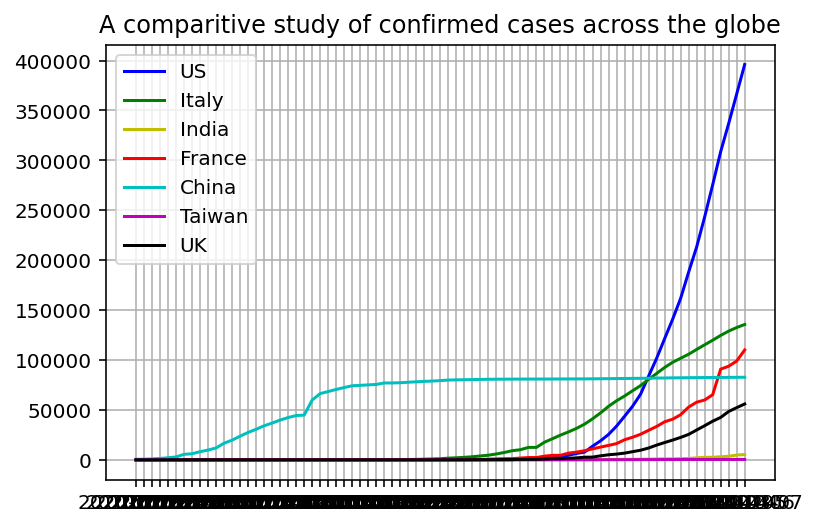

In [514]:
plt.plot(date, confirmed_cases_us, color = "b", label = "US")
plt.plot(date, confirmed_cases_italy, color = "g", label = "Italy")
plt.plot(date, confirmed_cases_india, color = "y", label = "India")
plt.plot(date, confirmed_cases_france, color = "r", label = "France")
plt.plot(date, confirmed_cases_china, color = "c", label = "China")
plt.plot(date, confirmed_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, confirmed_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of confirmed cases across the globe")
plt.legend()

plt.plot()

[]

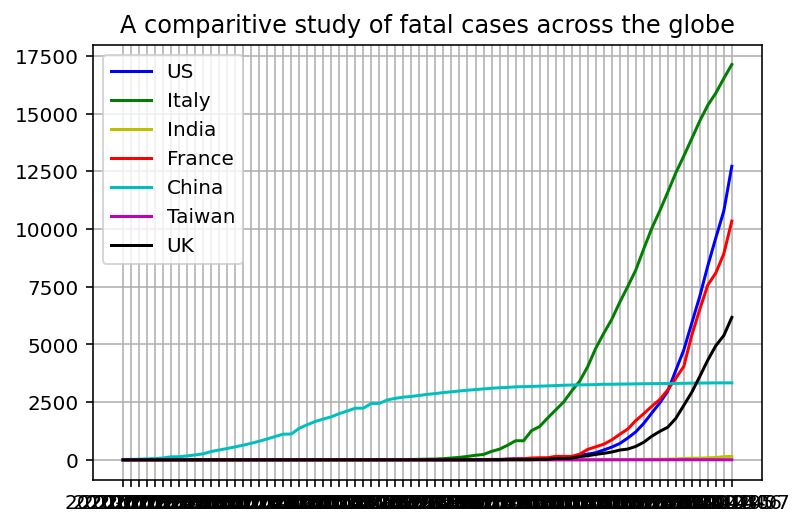

In [515]:
plt.plot(date, fatal_cases_us, color = "b", label = "US")
plt.plot(date, fatal_cases_italy, color = "g", label = "Italy")
plt.plot(date, fatal_cases_india, color = "y", label = "India")
plt.plot(date, fatal_cases_france, color = "r", label = "France")
plt.plot(date, fatal_cases_china, color = "c", label = "China")
plt.plot(date, fatal_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, fatal_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of fatal cases across the globe")
plt.legend()

plt.plot()

In [516]:
train.head()

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Id,,,,,
1,,Afghanistan,2020-01-22,0.0,0.0
2,,Afghanistan,2020-01-23,0.0,0.0
3,,Afghanistan,2020-01-24,0.0,0.0
4,,Afghanistan,2020-01-25,0.0,0.0
5,,Afghanistan,2020-01-26,0.0,0.0


In [0]:
train["Region"] = train["Country_Region"] + train["Province_State"]
test["Region"] = test["Country_Region"] + test["Province_State"]
train.drop(["Province_State", "Country_Region"], axis = 1, inplace = True) 
test.drop(["Province_State", "Country_Region"], axis = 1, inplace = True) 

In [518]:
train.head()

,Date,ConfirmedCases,Fatalities,Region
Id,,,,
1,2020-01-22,0.0,0.0,Afghanistan
2,2020-01-23,0.0,0.0,Afghanistan
3,2020-01-24,0.0,0.0,Afghanistan
4,2020-01-25,0.0,0.0,Afghanistan
5,2020-01-26,0.0,0.0,Afghanistan


In [0]:
def extract_from_date(df):
  day = []
  month = []
  for tstamp in df['Date']:
    t = tstamp.to_pydatetime()
    day.append(t.day)
    month.append(t.month)
  return day, month

In [0]:
train["Date"] = pd.to_datetime(train["Date"], format = "%Y-%m-%d")
test["Date"] = pd.to_datetime(test["Date"], format = "%Y-%m-%d")

In [521]:
train.head()

,Date,ConfirmedCases,Fatalities,Region
Id,,,,
1,2020-01-22,0.0,0.0,Afghanistan
2,2020-01-23,0.0,0.0,Afghanistan
3,2020-01-24,0.0,0.0,Afghanistan
4,2020-01-25,0.0,0.0,Afghanistan
5,2020-01-26,0.0,0.0,Afghanistan


In [0]:
day, month = extract_from_date(train) 
train['Day'] = day
train['Month'] = month

In [523]:
train.head()

,Date,ConfirmedCases,Fatalities,Region,Day,Month
Id,,,,,,
1,2020-01-22,0.0,0.0,Afghanistan,22,1
2,2020-01-23,0.0,0.0,Afghanistan,23,1
3,2020-01-24,0.0,0.0,Afghanistan,24,1
4,2020-01-25,0.0,0.0,Afghanistan,25,1
5,2020-01-26,0.0,0.0,Afghanistan,26,1


In [0]:
day, month = extract_from_date(test)
test['Day'] = day
test['Month'] = month

In [525]:
test.head()

,Date,Region,Day,Month
ForecastId,,,,
1,2020-03-26,Afghanistan,26,3
2,2020-03-27,Afghanistan,27,3
3,2020-03-28,Afghanistan,28,3
4,2020-03-29,Afghanistan,29,3
5,2020-03-30,Afghanistan,30,3


In [0]:
train.drop(["Date"], axis = 1, inplace = True)
test.drop(["Date"], axis = 1, inplace = True)

In [527]:
train.head()

,ConfirmedCases,Fatalities,Region,Day,Month
Id,,,,,
1,0.0,0.0,Afghanistan,22,1
2,0.0,0.0,Afghanistan,23,1
3,0.0,0.0,Afghanistan,24,1
4,0.0,0.0,Afghanistan,25,1
5,0.0,0.0,Afghanistan,26,1


In [0]:
le = LabelEncoder()
train["Regions_encoded"] = le.fit_transform(train["Region"])
test["Regions_encoded"] = le.fit_transform(test["Region"])

In [0]:
train.drop(["Region"], axis = 1, inplace = True)
test.drop(["Region"], axis = 1, inplace = True)

In [530]:
train.head()

,ConfirmedCases,Fatalities,Day,Month,Regions_encoded
Id,,,,,
1,0.0,0.0,22,1,0
2,0.0,0.0,23,1,0
3,0.0,0.0,24,1,0
4,0.0,0.0,25,1,0
5,0.0,0.0,26,1,0


In [531]:
train_size = int(len(train) * 0.9)
val_size = len(train) - train_size
print("Training size = {}".format(train_size))
print("Validation size = {}".format(val_size))

Training size = 21205
Validation size = 2357


In [532]:
training_data = train.iloc[0:train_size]
validation_data = train.iloc[train_size : len(train)]

print("Training data size = {}".format(len(training_data)))
print("Validation data size = {}".format(len(validation_data)))

Training data size = 21205
Validation data size = 2357


In [0]:
train_x = training_data[["Day", "Month", "Regions_encoded"]]
train_y = training_data[["ConfirmedCases", "Fatalities"]]

valid_x = validation_data[["Day", "Month", "Regions_encoded"]]
valid_y = validation_data[["ConfirmedCases", "Fatalities"]]

train_y_c = train_y[["ConfirmedCases"]]
train_y_f = train_y[["Fatalities"]]
valid_y_c = valid_y[["ConfirmedCases"]]
valid_y_f = valid_y[["Fatalities"]]

In [0]:
def create_dataset(x, y_c, y_f, time_steps):
  xs , ys_c, ys_f = [] , [], [] 
  for i in range(len(x) - time_steps):
    temp_x = x.iloc[i : (i + time_steps)].values
    temp_yc = y_c.iloc[i : (i + time_steps)].values
    temp_yf = y_f.iloc[i : (i + time_steps)].values 
    xs.append(temp_x)
    ys_c.append(temp_yc)
    ys_f.append(temp_yf)
  return np.array(xs) , np.array(ys_c), np.array(ys_f) 

In [535]:
time_steps = 2 
train_x , train_yc, train_yf = create_dataset(train_x, train_y_c, train_y_f, time_steps)
valid_x , valid_yc, valid_yf = create_dataset(valid_x, valid_y_c, valid_y_f, time_steps)
print(train_x.shape, train_yc.shape, train_yf.shape)
print(valid_x.shape, valid_yc.shape, valid_yf.shape)

(21203, 2, 3) (21203, 2, 1) (21203, 2, 1)
(2355, 2, 3) (2355, 2, 1) (2355, 2, 1)
